In [1]:
#import the needed python libraries
import numpy as np
import pandas as pd 
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from youtube_search import youtube_search #call youtube_search fuction

In [3]:
data = youtube_search('BBC News عربي')


In [4]:
df = pd.read_csv('video_result.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
title            50 non-null object
videoId          50 non-null object
viewCount        50 non-null int64
likeCount        50 non-null int64
dislikeCount     50 non-null int64
commentCount     50 non-null int64
favoriteCount    50 non-null int64
dtypes: int64(5), object(2)
memory usage: 2.8+ KB


In [5]:
#from data information it appears that there is no missing data

In [6]:
# explore data 
df.head()

,title,videoId,viewCount,likeCount,dislikeCount,commentCount,favoriteCount
0,BBC Arabic Live - lbth lmbshr ltlfzywn by by s...,HxI2TxhhS9A,7761426,0,0,0,0
1,btwqyt mSr : lq m` lmHmy@ mh 'bw bkr Hwl qDy l...,Cj5v_gXyJ_o,869,33,2,2,0
2,btwqyt mSr : lq m` lny'b 'Hmd TnTwy Hwl lkhlf ...,dkc8WdGnO6w,558,25,4,9,0
3,hl hnk f`lan ny@ lnsh Hlf `skry `rby `l~ Grr H...,Cir7oZV7T9A,1145,35,6,15,0
4,BBC Arabic TV - News - 081217,FDMffQuDOhY,31530,94,8,0,0


In [20]:
df.describe()

,viewCount,likeCount,dislikeCount,commentCount,favoriteCount
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,573680.160000,970.340000,178.340000,254.280000,0.000000
std,1878075.942920,2371.224523,485.052768,442.520888,0.000000
min,65.000000,0.000000,0.000000,0.000000,0.000000
25%,2090.750000,26.750000,3.000000,2.000000,0.000000
50%,24652.500000,107.000000,10.500000,16.500000,0.000000
75%,119684.000000,884.250000,88.500000,285.500000,0.000000
max,9189400.000000,15179.000000,3033.000000,1989.000000,0.000000


In [7]:
pd.set_option('float_format', '{:f}'.format)
df['viewCount'].describe()

count        50.000000
mean     573680.160000
std     1878075.942920
min          65.000000
25%        2090.750000
50%       24652.500000
75%      119684.000000
max     9189400.000000
Name: viewCount, dtype: float64

In [10]:
df['videoId'][df['viewCount']==df['viewCount'].min()]

35    cM5Hc_oM0_8
Name: videoId, dtype: object

In [12]:
#داخل الإطار: عمرو حسن

In [11]:
df['videoId'][df['viewCount']==df['viewCount'].max()] 

8    pKwwbY_g2Ac
Name: videoId, dtype: object

In [13]:
#فرانس 24 البث المباشر – الأخبار الدولية على مدار الساعة

In [21]:
df['videoId'][df['likeCount']==df['likeCount'].max()]

8    pKwwbY_g2Ac
Name: videoId, dtype: object

In [25]:
df['videoId'][df['dislikeCount']==df['dislikeCount'].max()]

8    pKwwbY_g2Ac
Name: videoId, dtype: object

In [26]:
df['videoId'][df['commentCount']==df['commentCount'].max()]

16    qsMpwPvU4Fc
Name: videoId, dtype: object

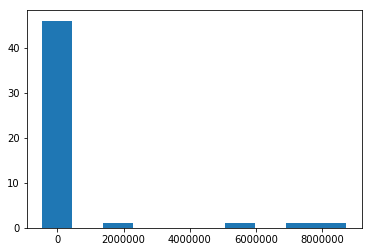

In [14]:
# plot and remove relative shift in matplotlib axis ount_veiw
import  matplotlib.ticker as mt
plt.figure()
ax = plt.gca()
fmt = mt.ScalarFormatter(useOffset=False)
fmt.set_scientific(False)
ax.xaxis.set_major_formatter(fmt)
hist_1,edges_1  = np.histogram(df['viewCount'])
plt.bar(edges_1[:-1], hist_1,width =edges_1[1:]-edges_1[:-1])
plt.show()

E:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


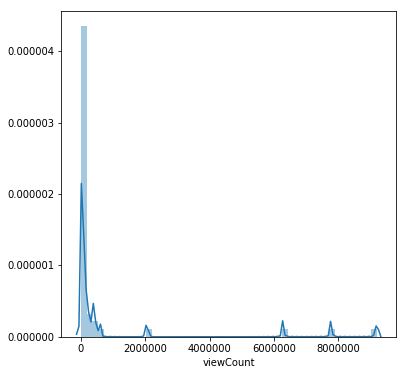

In [28]:
plt.figure(figsize = (6,6))
ax = plt.gca()
fmt = mt.ScalarFormatter(useOffset=False)
fmt.set_scientific(False)
ax.xaxis.set_major_formatter(fmt)
sns.distplot(df['viewCount'],bins =50, hist_kws={'alpha': 0.4})

E:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


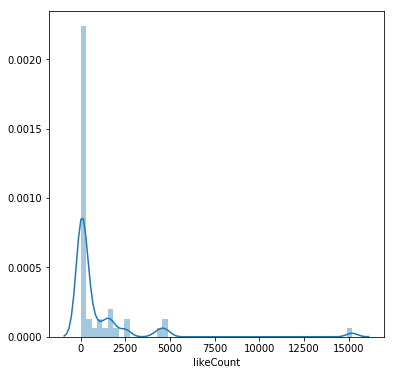

In [29]:
plt.figure(figsize = (6,6))
sns.distplot(df['likeCount'],bins =50, hist_kws={'alpha': 0.4})

E:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


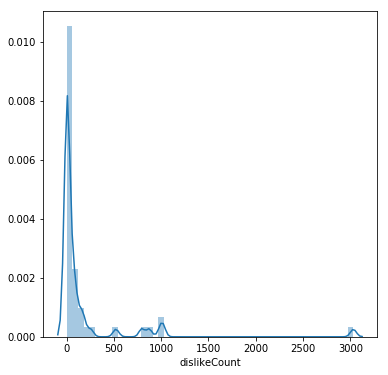

In [30]:
plt.figure(figsize = (6,6))
sns.distplot(df['dislikeCount'],bins =50, hist_kws={'alpha': 0.4})

E:\python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


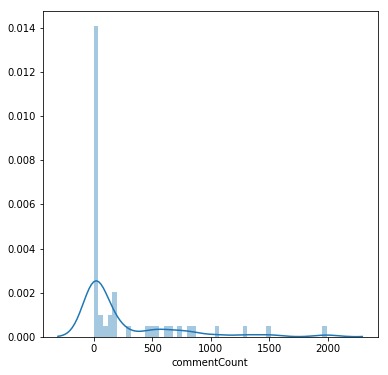

In [31]:
plt.figure(figsize = (6,6))
sns.distplot(df['commentCount'],bins =50, hist_kws={'alpha': 0.4})

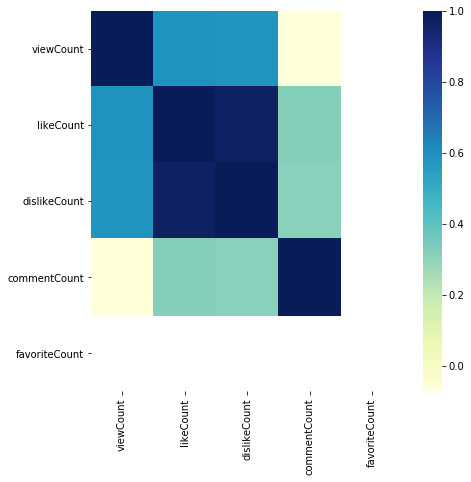

In [33]:
# exploraing the correlation between variables
plt.figure(figsize = (7,7))
sns.heatmap(df.corr(), cmap="YlGnBu")

In [14]:
df.corr()

,viewCount,likeCount,dislikeCount,commentCount,favoriteCount
viewCount,1.000000,0.611883,0.573999,0.074033,nan
likeCount,0.611883,1.000000,0.966620,0.506256,nan
dislikeCount,0.573999,0.966620,1.000000,0.584318,nan
commentCount,0.074033,0.506256,0.584318,1.000000,nan
favoriteCount,nan,nan,nan,nan,nan


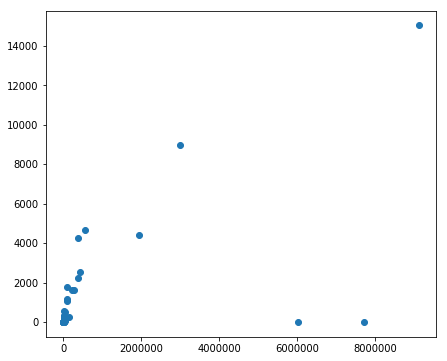

In [68]:
plt.figure(figsize = (7,6))
ax = plt.gca()
fmt = mt.ScalarFormatter(useOffset=False)
fmt.set_scientific(False)
ax.xaxis.set_major_formatter(fmt)
plt.scatter(df['viewCount'],df['likeCount'])

In [16]:
import statsmodels.api as sm
x = df['viewCount']
y = df['likeCount']
x = sm.add_constant(x)

In [17]:
lr_model = sm.OLS(y,x).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              likeCount   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     28.73
Date:                Fri, 27 Jul 2018   Prob (F-statistic):           2.34e-06
Time:                        15:18:04   Log-Likelihood:                -452.01
No. Observations:                  50   AIC:                             908.0
Df Residuals:                      48   BIC:                             911.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        547.8292    310.262      1.766      0.084     -75.994    1171.653
viewCount      0.0008      0.000      5.360      0.000       0.001       0.001
==============================================================================
Omnibus:                       14.335   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               58.948
Skew:                           0.202   Prob(JB):                     1.58e-13
Kurtosis:                       8.304   Cond. No.                     2.07e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""